In [25]:
# import library necessary

import pandas as pd
import numpy as np
import os
import re, string, unicodedata
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk

# Zad 
Pobierz dane ze strony:
https://www.kaggle.com/c/sa-emotions/overview

In [7]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'train_data.csv')) 
df.shape
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [8]:
df = df[:1000] 

df.isnull().sum()

sentiment    0
content      0
dtype: int64

# Zad
Zobacz ile jest klas.

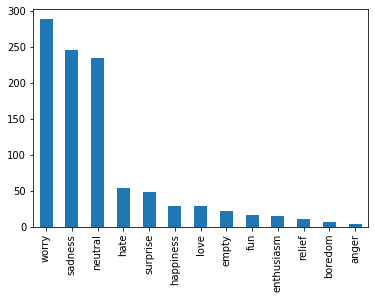

In [9]:
sentiment_freq = df['sentiment'].value_counts()
fig, ax = plt.subplots()

sentiment_freq.plot(ax=ax, kind='bar')

# Zad

Podzielmy atrybuty na część 
* objaśniającą $X$
* objaśnianą $y$

In [10]:
X = df.drop(['sentiment'], axis=1)
y = df['sentiment'].values
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


# Zad 
Przyjrzyjmy się $y$. Musi to być kolumna numeryczna z labealmi.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# Zad
Zbudujmy **pipeline** dla atrybutu "content":

 * usuń adresy stron interntowych
 * usuń słowa zaczynające się od "@"
 * usuń punktory
 * usuń liczby (lub zamień je na jeden token "<NUMBER\>")
 * zamień wszystkie słowa na zaczynające się z małej litery
 * wygeneruj reprezentację    
 * Tfidf

# Zad

Robimy StratifiedKFold i znajdujemy optymalne parametry dla


* MultinomialNB (bez redukcji wymiarowości)
* LogisticRegression
* LinearSVC
* SVC
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* BaggingClassifier
* ExtraTreesClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* VotingClassifier
* xgboost.XGBClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', LinearSVC())])


param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_1.fit(X_train, y_train)
grid_1.best_params_

In [ ]:
from sklearn import  metrics


models = []
models.append(('SVM linear', grid_1.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

In [ ]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM linear'])
df